In [26]:
!pip install autoviml

In [0]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
data = pd.read_csv("/content/drive/My Drive/imdb_sentiment.csv")

In [29]:
data.head(10)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


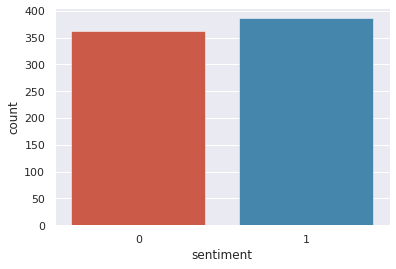

In [31]:
sns.countplot(data["sentiment"])

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size = 0.20)

In [0]:
from autoviml.Auto_NLP import Auto_NLP


Auto NLP processing on NLP Column: review
Shape of Train Data: 598 rows
    Shape of Test Data: 150 rows


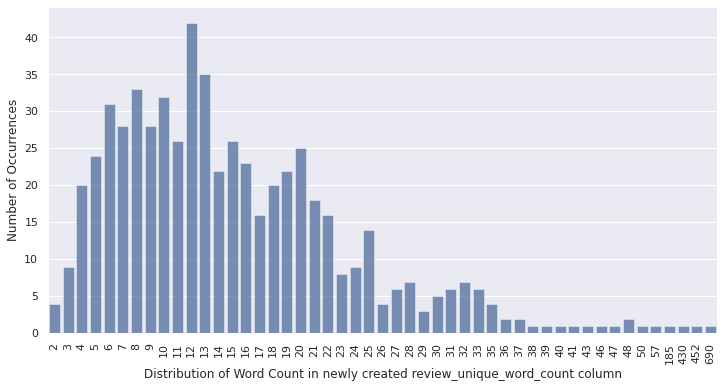

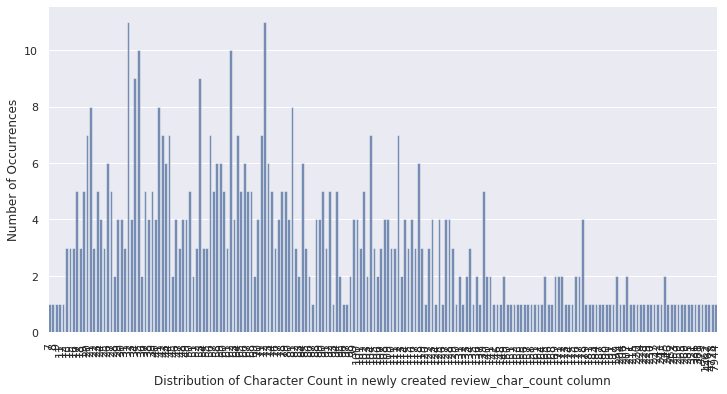

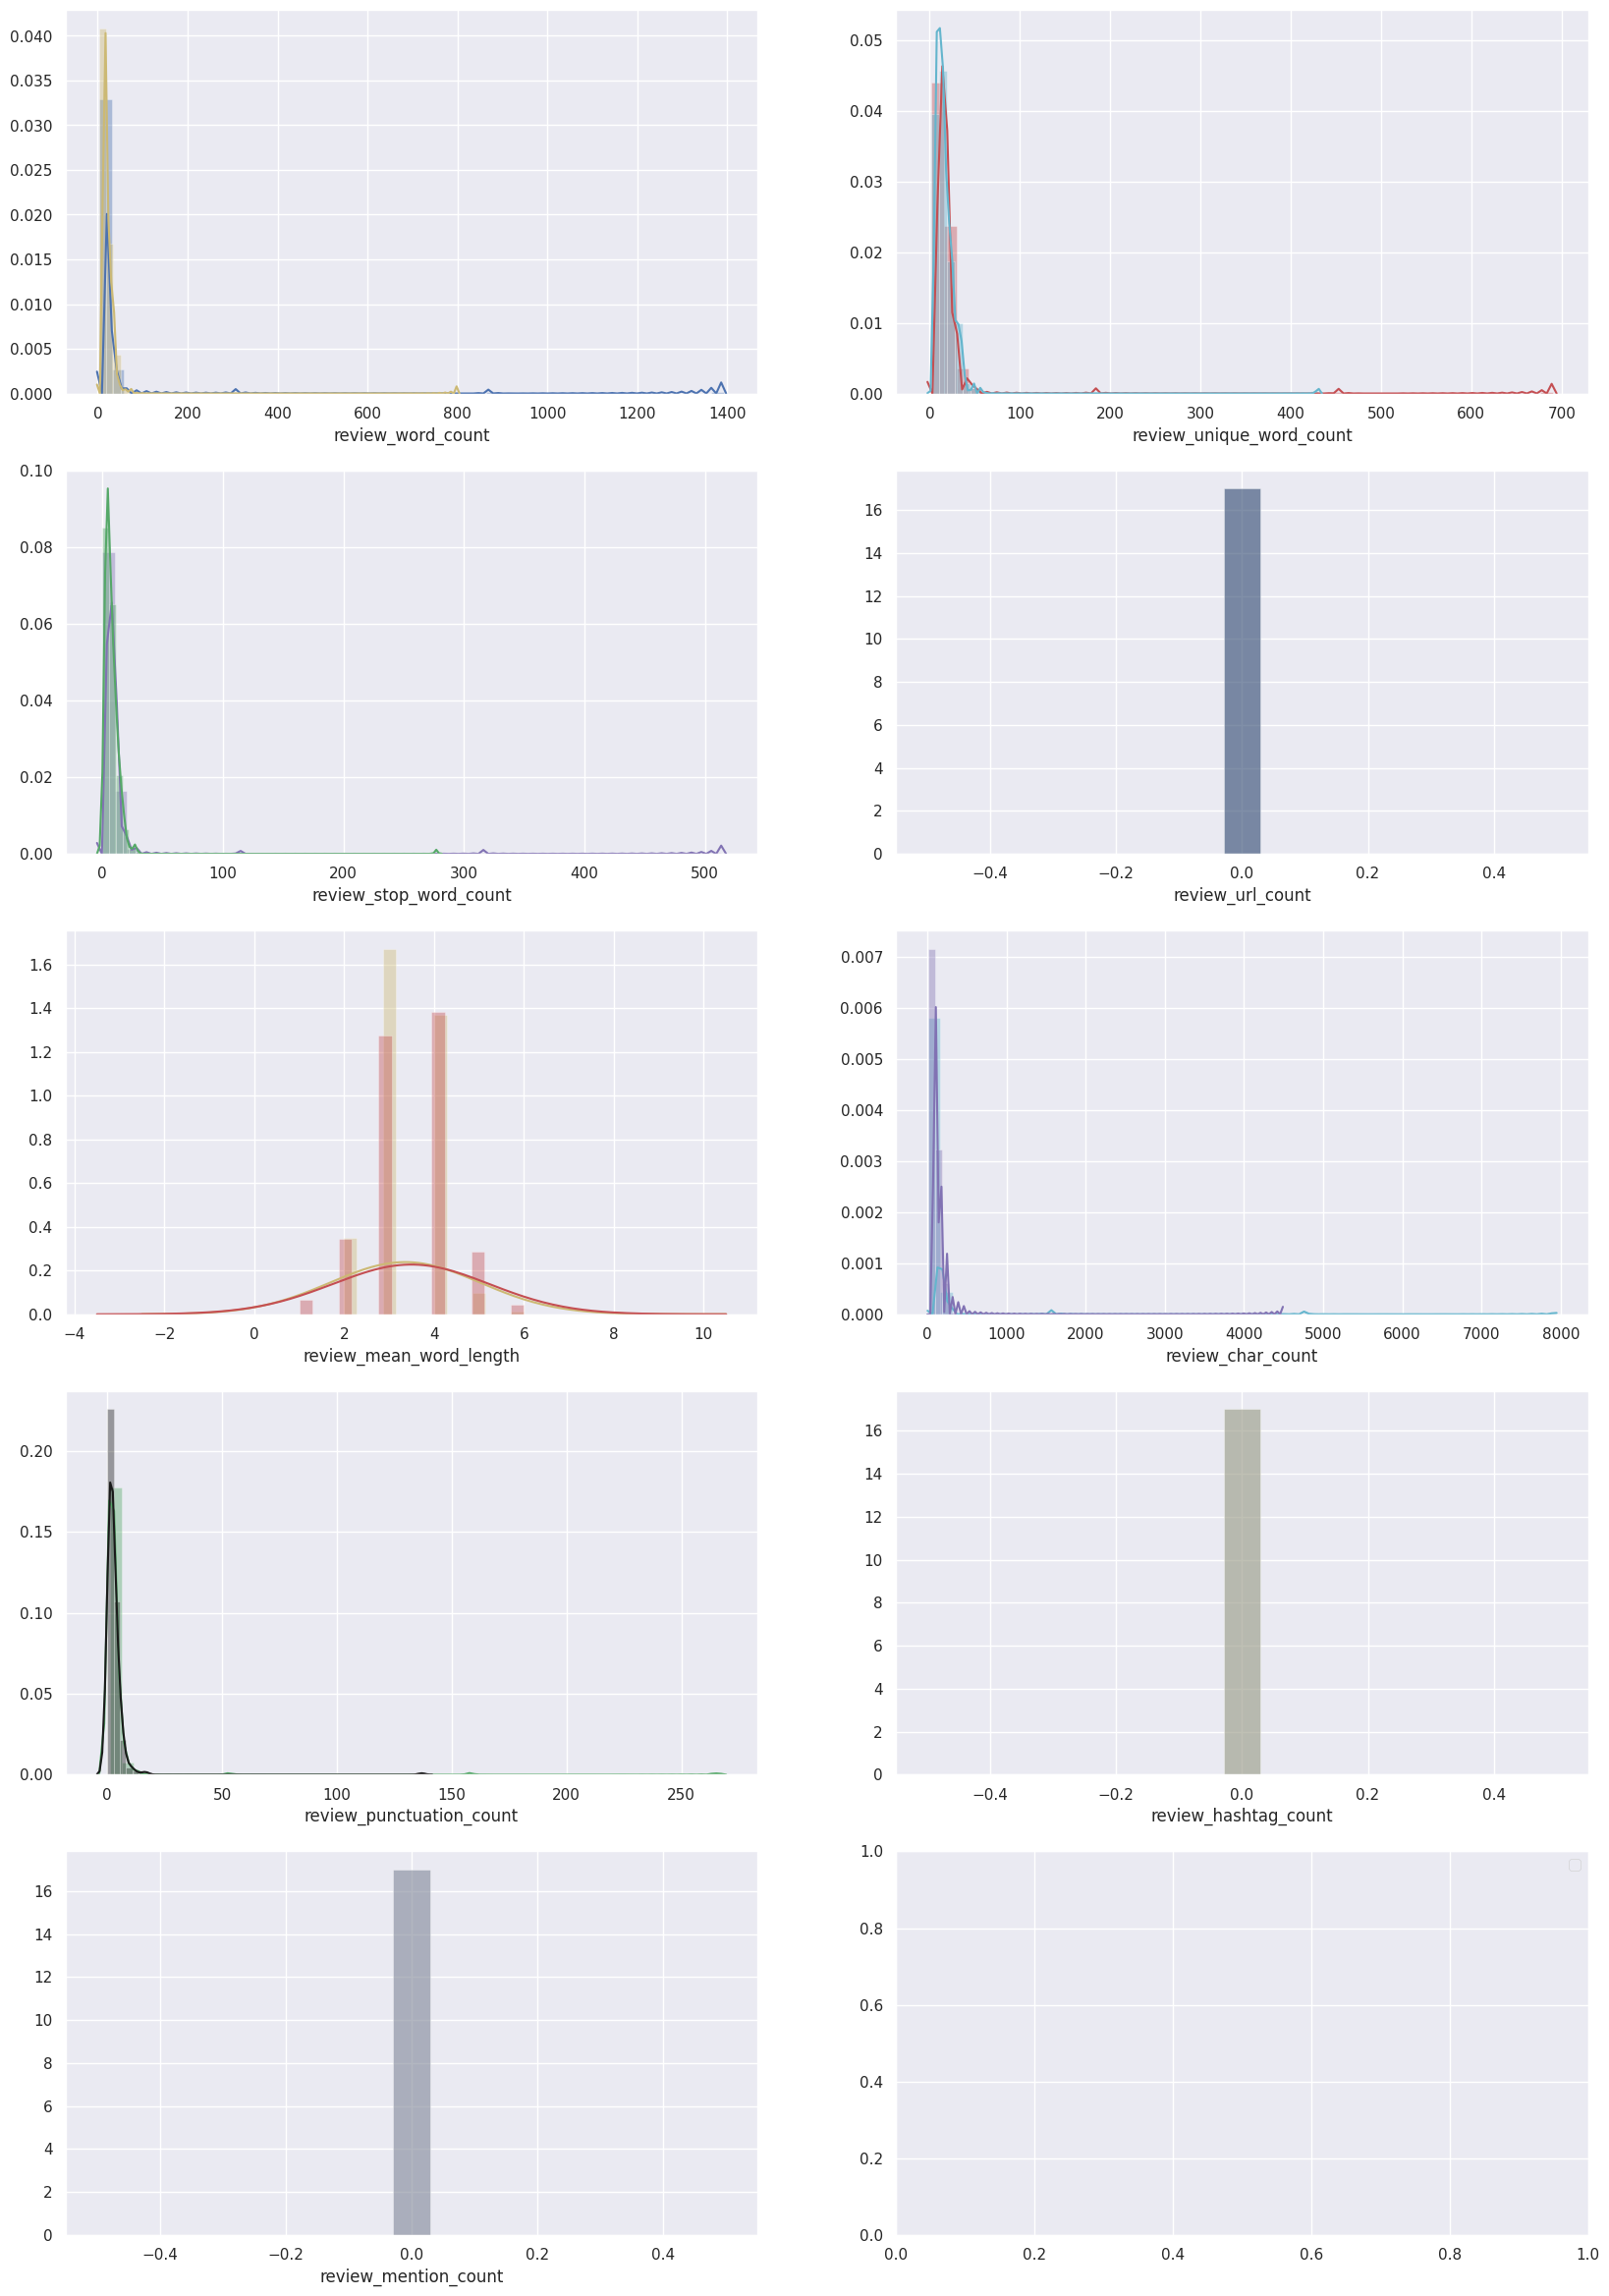

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in review before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 0 seconds
        Time Taken for Processing text in Train data = 1 seconds
            Time Taken for Stopword removal in Train data = 0 seconds
    Cleaning text in review before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 0 seconds
        Time Taken for Processing text in Test data = 0 seconds
            Time Taken for Stopword removal in Test data = 0 seconds
Train and Test data Text cleaning completed. Time taken = 0 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = review 
#################################################################################
Generating new feature

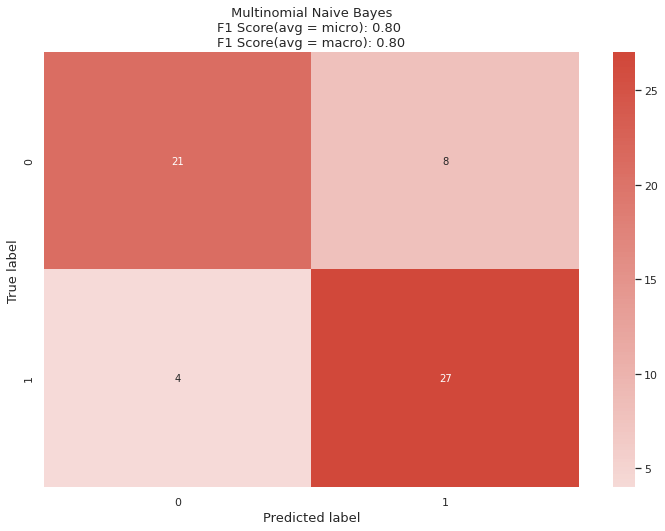

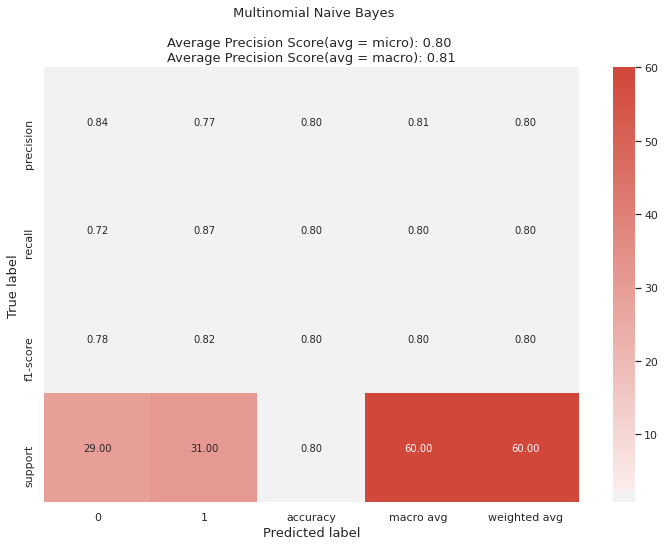

Training Pipeline on full Train data. This will take time...
    Time taken to train Pipeline on full Train shape ((598,)) and test on ((150, 11)) = 0.05 seconds
Time taken for Auto_NLP = 0.2 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [34]:
nlp_column = "review"
target = "sentiment"

train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train_df, test_df, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=3)


In [35]:
nlp_pipeline

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.05, max_features=1078,
                                 min_df=2, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=True, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.5656174196105306, class_prior=None,
                               fit_prior=True))],
         verbose=False)

In [36]:
nlp_pipeline.predict(test_df["review"])

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])